
### 📘 Co to regresja logistyczna?

Regresja logistyczna to model statystyczny, który służy do **przewidywania prawdopodobieństwa** wystąpienia zdarzenia. Najczęściej używamy jej do **klasyfikacji binarnej** – czyli decyzji „tak” lub „nie”, „1” lub „0”, np.:
- czy ktoś zda egzamin?
- czy wiadomość to spam?
- czy klient kupi produkt?

Model działa tak:

`p = 1 / (1 + e^-(β₀ + β₁x₁ + β₂x₂ + ...))`

Gdzie:
- `p` – przewidywane prawdopodobieństwo (zawsze między 0 a 1)
- `β₀, β₁, …` – wagi (parametry modelu)
- `x₁, x₂, …` – cechy wejściowe (np. czas nauki, liczba nieobecności)

Jeśli:
- `p >= 0.5` → przewidujemy klasę **1**
- `p < 0.5` → przewidujemy klasę **0**


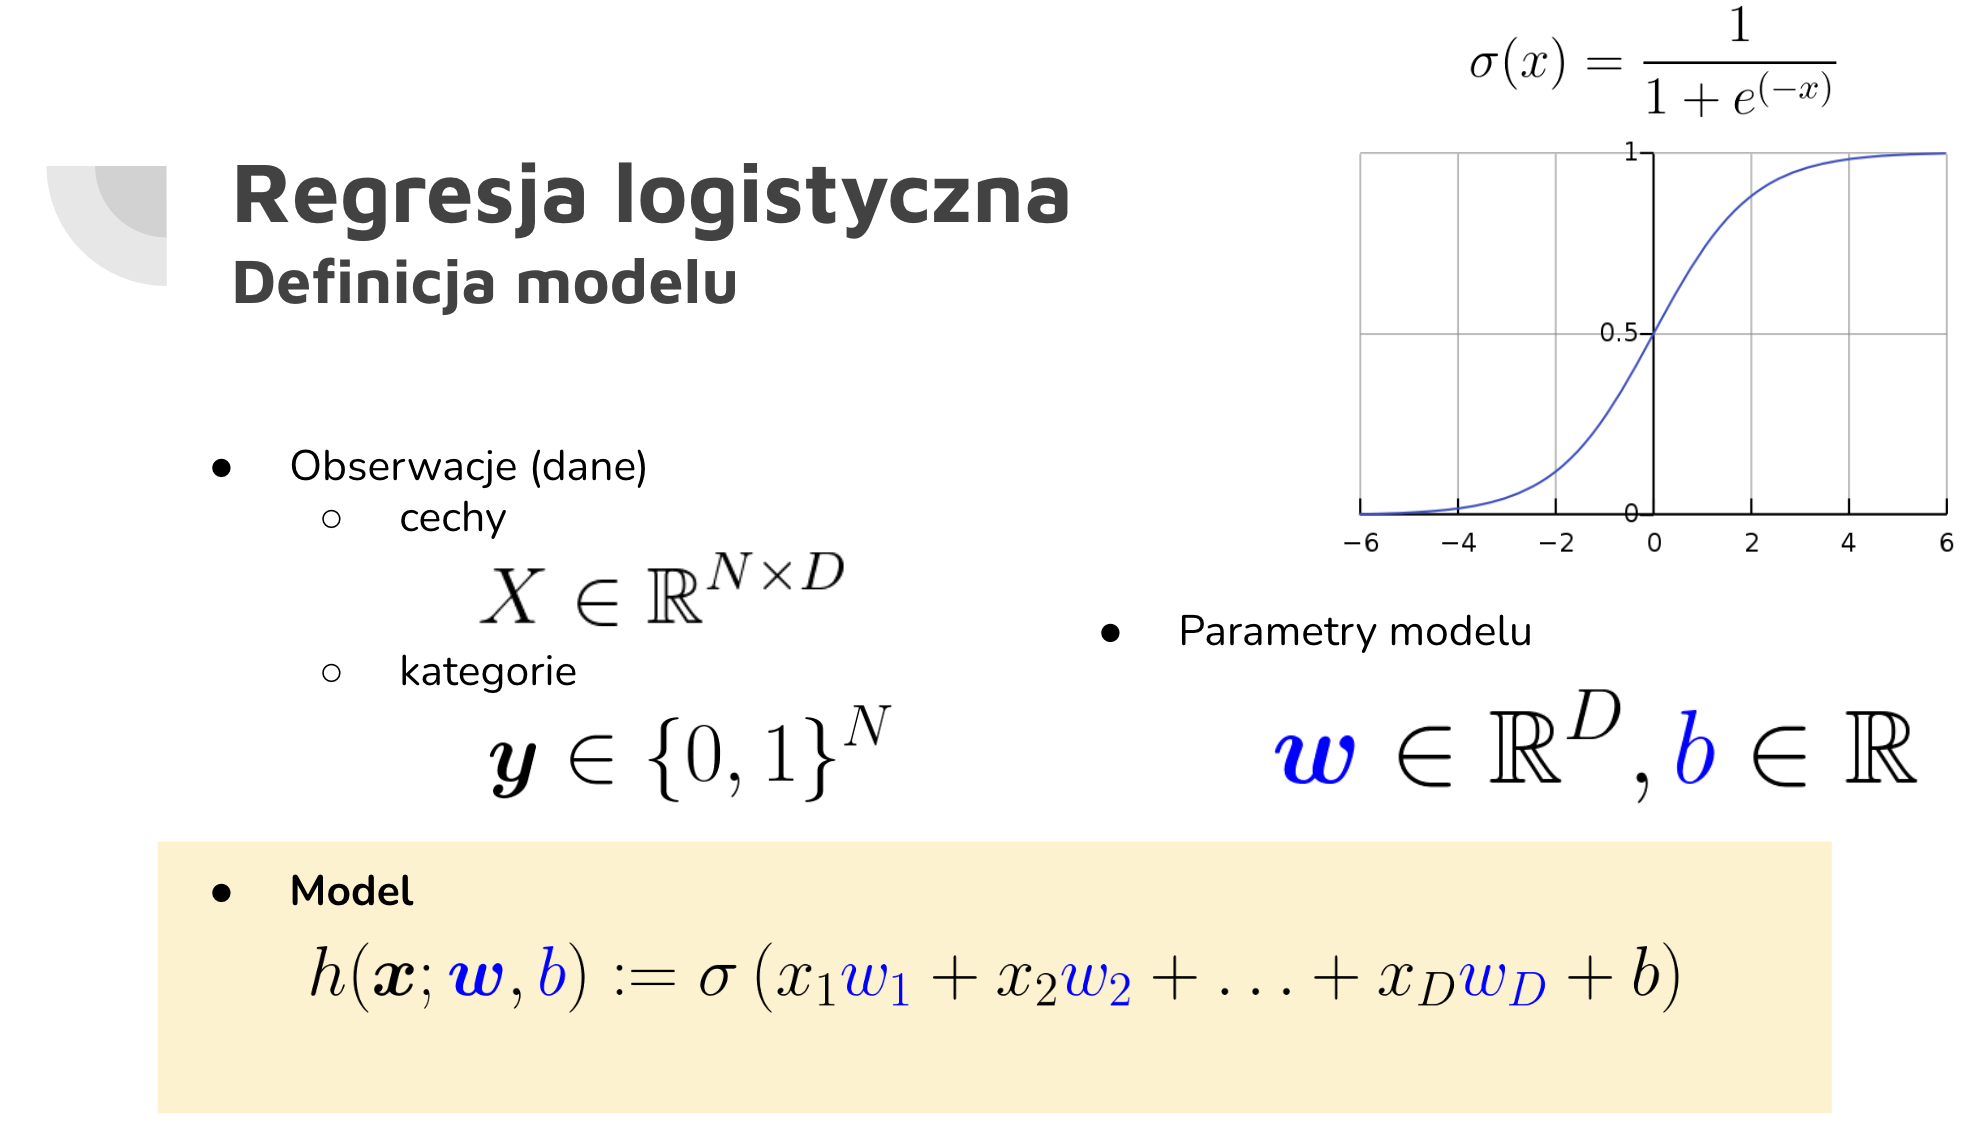

### 🧠 Czym się różni regresja logistyczna od liniowej?

|                       | **Regresja liniowa**                  | **Regresja logistyczna**                |
|-----------------------|---------------------------------------|------------------------------------------|
| **Cel**               | Przewiduje **wartość liczbową**       | Przewiduje **prawdopodobieństwo**        |
| **Zastosowanie**      | Prognoza (np. cena, długość)          | Klasyfikacja (np. tak/nie, pies/kot)          |
| **Wynik**             | Dowolna liczba (np. -3, 10.2)          | Liczba z przedziału **0–1**              |
| **Funkcja wyjściowa** | `y = β₀ + β₁x`                         | `p = 1 / (1 + e^-(β₀ + β₁x))`            |
| **Wykres**            | Prosta linia                          | Krzywa S-kształtna (sigmoidalna)         |

---

### 🧪 Podsumowanie

- **Regresja liniowa** mówi *ile*.
- **Regresja logistyczna** mówi *czy* – i z jakim prawdopodobieństwem.
- Funkcja sigmoidalna pozwala "spłaszczyć" wynik do zakresu między 0 a 1.


## Cel

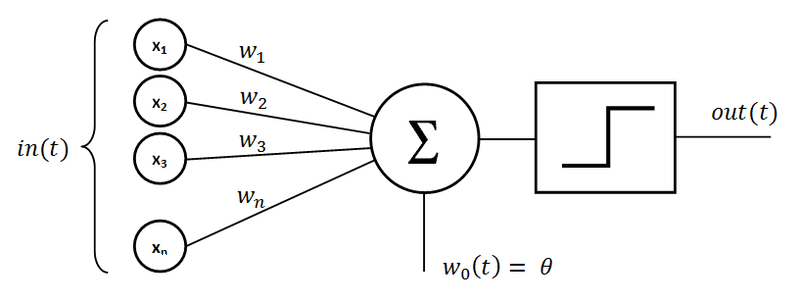

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# 🔧 Ustaw liczbę przykładów
N = 100
np.random.seed(42)  # Żeby wyniki były powtarzalne

# Dane wejściowe
study_hours = np.random.uniform(0, 10, N)
absences = np.random.poisson(2, N)

# Prawdziwe wagi (dla symulacji „prawdziwego świata”)
true_beta = np.array([-6, 1.0, -1.0])  # intercept, study_hours, absences
X_aug = np.c_[np.ones(N), study_hours, absences]
probs = 1 / (1 + np.exp(-X_aug @ true_beta))

# Etykiety losowane na podstawie prawdopodobieństwa
y = (np.random.rand(N) < probs).astype(int)

# Finalne dane wejściowe
X = np.c_[study_hours, absences]

# --- Interaktywna część
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def show_predictions(beta_0, beta_1, beta_2):
    weights = np.array([beta_0, beta_1, beta_2])
    z = X_aug @ weights
    pred_probs = sigmoid(z)
    preds = (pred_probs >= 0.5).astype(int)

    acc = np.mean(preds == y)
    colors = np.where(preds == y, 'green', 'red')

    # Wykres
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, edgecolors='k', alpha=0.7)
    plt.xlabel("Czas nauki (godz.)")
    plt.ylabel("Liczba nieobecności")
    plt.title(f"Predykcja (trafność: {acc * 100:.1f}%)")
    plt.grid(True)
    plt.show()

interact(
    show_predictions,
    beta_0=FloatSlider(value=-4, min=-10, max=10, step=0.5, description='β₀'),
    beta_1=FloatSlider(value=1, min=-5, max=5, step=0.1, description='β₁ (nauka)'),
    beta_2=FloatSlider(value=-1, min=-5, max=5, step=0.1, description='β₂ (nieobec.)'),
);


interactive(children=(FloatSlider(value=-4.0, description='β₀', max=10.0, min=-10.0, step=0.5), FloatSlider(va…